# **Data Cleaning & Preprocessing**

## Objectives

* This notebook documents the systematic steps for data cleaning and preprocessing which are necessary to ensure the data is in a suitable format for subsequent visualisations and analysis.

- Handle missing values effectively.
- Convert date data into usable formats.
- Filter and prepare the dataset for further analysis.

## Inputs
* Raw Dataset: `01_RAW_NEA-Seafloor-Litter.csv`. 

    This served as the initial data source.

## Outputs

* Processed Dataset: `02_PROCESSED_NEA-Seafloor-Litter.csv`. 

    This is the output file of the data cleaning and preprocessing operations.

## Additional Comments

* To ensure the data is accurate and ready for analysis, preprocessing is essential. This included the removal of missing data, the standardisation of data types, and the elimination of extraneous variables, thereby enhancing the dataset's reliability and analytical utility.



---

# Change working directory

To facilitate proper file access, the working directory is to be adjusted to its parent directory
* os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis/jupyter_notebooks'

To set the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis'

---

## 1.1 Extract: Importing Libraries & Extracting Dataset

This section involves:
- Importing the required libraries for data manipulation and subsequent operations.
- Loading the data from a CSV file into a Pandas DataFrame as the Pandas library contains helpful methods for loading, cleaning, and transforming data.

In [31]:
'''
Importing necessary libraries
    1) Pandas: for data manipulation and analysis
    2) NumPy: for numerical operations
'''
import pandas as pd 
import numpy as np

After importing these libraries, load in the raw dataset using the `read_csv()` function.

In [5]:
# Read the dataset in with read_csv()
raw_df = pd.read_csv("data/01_RAW_NEA-Seafloor-Litter.csv")


# Verify successful operation
print("Dataset loaded successfully!")

Dataset loaded successfully!


## 1.1 Evaluation

 `pd.read_csv()` was used because it's a standard and efficient method for importing CSV files into a DataFrame in Python. 

- **Approach**: The `read_csv()` function was used to to load the raw data and a print statement to verify its successful operation with a confirmation message. 

- **Alternative Approach**: If given had more time, alternative file formats or added parameters to handle specific edge cases (e.g., encoding issues or large file chunks) could have been explored.

- **Limitation**: A limitation of this method is that it assumes the CSV file is correctly formatted, and it may not handle errors or inconsistencies in the data without additional checks or cleaning steps.


The dataset is correctly loaded and ready for further processing.

---

## 1.2 Understanding the Data

This section involves:
- Examining dataset structure and datatypes.
- Correcting incorrect data types.
- Renaming the fldDateTimeShot column to 'date'.
- Identifying missing values.

### 1.2.1 Data Type Inspection

**In this subsection:**

A function is created to display the following:
- `data_frame.shape`  returns the dimensionality of the DataFrame.
- `info()` method to print data types and non-null counts for each column.
- `head()` method to display the first five rows for inspection.


In [6]:
def check_data_and_types(data_frame):
    """
    This function shows the type of data for each column and the first 5 rows of the dataset.

    Args: data_frame: The data frame we want to inspect.
    """

    print(" ----- Total Rows and Columns -----")
    print(data_frame.shape)
    print ('\n')

    print(" ----- Data Types -----")
    print(data_frame.info())
    print ('\n')
    
    print(" ----- First Five Rows -----")
    print(data_frame.head())

    

check_data_and_types(raw_df)

 ----- Total Rows and Columns -----
(4310, 62)


 ----- Data Types -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               4310 non-null   int64  
 1   survey             4310 non-null   object 
 2   cruise             4310 non-null   object 
 3   area               4033 non-null   object 
 4   station            4310 non-null   int64  
 5   fldHaulLatDegrees  4310 non-null   int64  
 6   fldHaulLatMinutes  4052 non-null   float64
 7   fldHaulLonDegrees  4310 non-null   int64  
 8   fldHaulLonMinutes  4052 non-null   float64
 9   fldHaulEorW        4057 non-null   object 
 10  fldShotLatDegrees  3829 non-null   float64
 11  fldShotLatMinutes  3603 non-null   float64
 12  fldShotLonDegrees  3745 non-null   float64
 13  fldShotLonMinutes  3519 non-null   float64
 14  fldShotEorW        3519 non-null   object 
 15 

**From this, we observe:**

- Numerical Columns: Columns like year, station, fldHaulLatDegrees, fldHaulLonDegrees, Latitude, Longitude, etc., are of numerical data types like int64 and float64.

- Categorical Columns: Columns like survey, cruise, area, and fldHaulEorW are of object type, which means they are categorical columns.

- Date/Time Columns: The fldDateTimeShot column is of object type, which might need conversion into a proper datetime format for analysis.

**What Needs to Be Changed?**

- Date Column (fldDateTimeShot): This column should be converted to a proper datetime type, as it is currently stored as an object (string). 

This will allow for easier manipulation and time-based analysis.

### 1.2.2 Date Format Conversion

In [7]:
# Convert the 'fldDateTimeShot' column to datetime
raw_df['fldDateTimeShot'] = pd.to_datetime(raw_df['fldDateTimeShot'], errors = 'coerce', dayfirst=True)

# errors = 'coerce' --> will convert any errors to blank values
# dayfirst = True --> will convert the date to the format 'dd/mm/yyyy'

print("Conversion successful!")

# Check the data types of the date column
raw_df['fldDateTimeShot'].dtypes

Conversion successful!


dtype('<M8[ns]')

`dtype('<M8[ns]') ` is a datetime format - conversion successful

In [33]:
# Rename fldDateTimeShot to 'datetime' for better understanding
raw_df.rename(columns={'fldDateTimeShot': 'date'}, inplace=True)

### 1.2.3 Missing Value Identification

In this section:
- Use isna() to identify missing values.

In [8]:
def get_missing_values(data_frame):
    """
    This function returns the number of missing values in the dataset.

    Args: data_frame: The data frame we want to inspect.
    """
    missing_values = data_frame.isna().sum() # Get the number of missing values in each column
    print(missing_values[missing_values > 0]) # Only print columns with missing values

get_missing_values(raw_df)

area                 277
fldHaulLatMinutes    258
fldHaulLonMinutes    258
fldHaulEorW          253
fldShotLatDegrees    481
fldShotLatMinutes    707
fldShotLonDegrees    565
fldShotLonMinutes    791
fldShotEorW          791
dtype: int64


We can utilise this list to target missing values in the handling section.

## 1.2 Evaluation

#### `check_data_and_types()` Function  
The `check_data_and_types()` function was implemented to provide a quick overview of the dataset, including its shape, data types, and initial content.  

- **Approach**: The `shape`, `info()`, and `head()` functions were utilised within this custom function to inspect the dataset’s structure and initial data.  

- **Alternative Approach**: Additional checks for outliers or duplicate rows could be incorporated to enhance the initial inspection.  

- **Limitation**: This method provides only a basic overview and does not detect deeper data issues such as inconsistencies in values or complex missing data patterns.  

#### DateTime Conversion  
For datetime conversion, `pd.to_datetime()` was used with the arguments `errors='coerce'` and `dayfirst=True` to ensure consistent handling of date formats and errors.  

- **Alternative Approach**: Additional handling for different time zones or alternative date formats could be considered.  

- **Limitation**: Any invalid date values are coerced into NaT (Not a Time), which may lead to data loss in cases where errors occur. 

#### Renaming Columns
I renamed the `fldDateTimeShot` column to 'date' for better readability and consistency across the dataset. This ensures the column name is more intuitive and easier for users to work with.

- **Alternative Approach**: If I had more time, I could have standardised other column names as well to ensure consistency across the entire dataset, potentially improving user experience and reducing confusion. But for the most part, column names were intuitive and standard across.
 


---

## 1.3 Handling Missing & Incorrect Values 

This section covers: 
- Imputing missing 'area' values by station.
- Filling remaining missing 'area' values with "Unknown".
- Removing redundant 'fld' columns.

- **Categorical Columns**: Fill with "Unknown", where sensible to do so, to avoid losing important data.
  
- **Numerical Columns**: Impute, where sensible to do so, to preserve data distribution.  

### 1.3.1 Missing Area Data Imputation

GitHub Copilot (AI tool) was initially used to generate a cross-checking function for the 'area' column. This function was later refined with the assistance of ChatGPT, which improved the logic to automatically impute missing values for rows where a station is linked to a single sea.

In [9]:
def find_sea_by_station_and_impute(data_frame):
    """
    Imputes missing 'area' values based on station associations.
    - If a station has only one associated area, assign that area.
    - If a station has multiple associated areas (e.g., Celtic & Greater North Sea), assign a combined label.
    - If no area is found, assign "Unknown".
    
    Returns the modified DataFrame explicitly.
    """
    missing_area_rows = data_frame[data_frame['area'].isna()]
    initial_missing = missing_area_rows.shape[0]
    print(f"Initial missing values: {initial_missing}")

    missing_areas_stations = missing_area_rows['station'].unique()

    # Counters for different cases
    single_area_imputed = 0
    multiple_areas_imputed = 0
    unknown_imputed = 0

    for station in missing_areas_stations:
        asoc_seas = data_frame[data_frame['station'] == station]['area'].dropna().unique()

        if len(asoc_seas) == 1:
            # If only one associated area, impute that value
            sea_to_impute = asoc_seas[0]
            data_frame.loc[(data_frame['station'] == station) & (data_frame['area'].isna()), 'area'] = sea_to_impute
            single_area_imputed += 1

        elif len(asoc_seas) > 1:
            # Handle cases where a station is associated with both "Celtic Sea" and "Greater North Sea"
            if set(asoc_seas) == {"Celtic Sea", "Greater North Sea"}:
                sea_to_impute = "Celtic & Greater North Sea"
            else:
                # For other combinations of areas, join them dynamically
                sea_to_impute = ", ".join(asoc_seas)

            data_frame.loc[(data_frame['station'] == station) & (data_frame['area'].isna()), 'area'] = sea_to_impute
            multiple_areas_imputed += 1

        else:
            # No valid areas found → Assign "Unknown"
            data_frame.loc[(data_frame['station'] == station) & (data_frame['area'].isna()), 'area'] = "Unknown"
            unknown_imputed += 1

    # Print summary of imputation results
    print(f"Summary of imputations:")
    print(f"- {single_area_imputed} stations had a single area imputed.")
    print(f"- {multiple_areas_imputed} stations had multiple areas imputed.")
    print(f"- {unknown_imputed} stations had no area info; imputed 'Unknown'.")
    
    remaining_missing = data_frame['area'].isna().sum()
    print(f"Missing values after imputation: {remaining_missing}")

    return data_frame

# Call function and reassign raw_df
raw_df = find_sea_by_station_and_impute(raw_df)


Initial missing values: 277
Summary of imputations:
- 62 stations had a single area imputed.
- 72 stations had multiple areas imputed.
- 5 stations had no area info; imputed 'Unknown'.
Missing values after imputation: 0


In [10]:
# Verify successful operation
get_missing_values(raw_df)

fldHaulLatMinutes    258
fldHaulLonMinutes    258
fldHaulEorW          253
fldShotLatDegrees    481
fldShotLatMinutes    707
fldShotLonDegrees    565
fldShotLonMinutes    791
fldShotEorW          791
dtype: int64


### 1.3.2 Removing Unnecessary Location Data

The `fld ...` columns exhibit a significant proportion of missing values. Given that one of the primary objectives of this project is to visualise the data, these columns will simply be removed with the exception of the date. 

Note that the `Latitude` and `Longitude` columns will be retained, as they are complete within the dataset, and are sufficient variables for spatial visualisations.

Removal of these columns as opposed to row deletion will minimise the data loss and streamline the dataset.

In [12]:
# Remove the fld columns 
cols_to_remove = [
    'fldHaulLatMinutes',
    'fldHaulLonMinutes',
    'fldHaulEorW',
    'fldShotLatDegrees',
    'fldShotLatMinutes',
    'fldHaulLatDegrees',
    'fldHaulLonDegrees',
    'fldShotLonDegrees',
    'fldShotLonMinutes',
    'fldShotEorW',
]

raw_df = raw_df.drop(columns=cols_to_remove, axis=1)

get_missing_values(raw_df)

Series([], dtype: int64)


## 1.3 Evaluation

#### `find_sea_by_station_and_impute()` Function
I created the `find_sea_by_station_and_impute()` function to efficiently handle the imputation of missing 'area' values by associating them with specific stations. This approach ensures that missing data is filled logically based on existing associations, maintaining data consistency. The function uses `data_frame['area'].isna()` to identify rows with missing 'area' and iterates through stations to fill in missing values.

- **Improvement**: I streamlined the print statements to summarise the number of imputations for each case (single area, multiple areas, and unknown) instead of printing each individual station. This improves readability for the user, providing a clear overview of the imputation process without overwhelming them with unnecessary details. The function now prints a summary of imputations after the process completes, making the output more user-friendly.
  
- **Alternative Approach**: If I had more time, I could explore more sophisticated imputation methods such as machine learning models or interpolation based on other relevant features (e.g., temporal or geographical data), which might allow for more accurate imputations in complex cases.

- **Limitation**: A limitation of this method is that it assumes stations are consistently associated with specific seas. The method might not perform well in cases where stations are associated with multiple, inconsistent seas, as it simply combines them or defaults to "Unknown" in ambiguous cases.

#### Filling Remaining Missing Values
After imputing areas based on station associations, I handled any remaining missing 'area' values by assigning them the value "Unknown". This ensures no missing values remain, maintaining the completeness of the dataset.

- **Improvement**: I now use a more streamlined method by summarising the number of imputations in different categories (e.g., stations with a single area, multiple areas, or unknown areas) rather than printing individual imputations. This helps users quickly grasp the impact of the imputation process.

- **Alternative Approach**: If I had more time, I could explore domain-specific logic or expert knowledge to handle the "Unknown" imputation more effectively. For example, identifying patterns or using known geospatial data could improve how "Unknown" values are assigned.

- **Limitation**: A limitation of this method is that the use of "Unknown" may obscure underlying issues with missing data, which could be important for analysis. It's possible that the "Unknown" label masks meaningful gaps that need further investigation.

#### Removing Redundant Columns
I removed redundant 'fld' columns from the dataset, except the date column, as they were not necessary for the analysis. This was done using the `drop()` function to clean up the dataset and reduce complexity.

- **Alternative Approach**: If I had more time, I could conduct a deeper analysis to determine if any of these columns might hold value for specific use cases, such as for particular subgroups of the dataset or specific analyses.

- **Limitation**: A limitation of this approach is that removing columns without fully understanding their potential utility could result in the loss of useful information. Further examination of the dataset's context or domain-specific knowledge might be necessary before deciding on which columns to discard.

---

## 1.4 Removing Duplicates

### 1.4.1 Duplicate Row Removal

In [14]:
# Remove duplicate rows
raw_df.drop_duplicates(inplace=True)

print(f"There are {raw_df.duplicated().sum()} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


## 1.4 Evaluation

I chose to remove duplicate rows using `drop_duplicates()` because it is a simple and effective method to clean the dataset by eliminating redundant entries.

- **Approach**: I used the `drop_duplicates()` function to remove duplicate rows, followed by a check with `duplicated().sum()` to verify the number of remaining duplicates.
- **Alternative Approach**: If I had more time, I could have examined the reason for duplicates, such as whether they represent valid repeated data or erroneous entries.
- **Limitation**: A limitation of this method is that it blindly removes duplicate rows without considering whether they might hold value or represent valid repeated data in certain contexts.


---

## 1.5 Category Mapping

In order to faciliate the analysis of the marine litter composition, the items must first be categorised.

Utilising the information contained within the CEFAS data code book, the items were classified based on their primary materials.

The categories established were as follows:

- `Plastic:` This category includes items composed of synthetic polymers, encompassing bottles, sheets, bags, and various fishing-related plastics.

- `Metal:` This category includes items composed of metallic substances, such as cans, drums, and metal components from appliances.

- `Rubber:` Items made from natural or synthetic rubber, including boots, balloons, and tires, were classified within this category.

- `Glass:` Items composed of silica-based materials, such as jars, bottles, and glass fragments, were grouped within this category.

- ` Plant-Based Materials:` This category includes items derived from plant matter, encompassing both natural and processed wood, paper, and plant-based rope.

- `Clothing & Fabrics:` Textiles and related items, such as clothing and shoes, were classified within this category.

- `Miscellaneous:` This category served as a catch-all for items that did not readily fit into the aforementioned categories.

In [15]:
categories = {
    'Plastic': ['bottle', 'sheet', 'bag', 'caps', 'fishline.mono',
        'fishline.tang', 'synthrope', 'fishnet', 'cabletie',
        'strap', 'nappies', 'crates', 'santowels', 'other.plas'],

    'Metal': ['cansfood', 'cansdrink', 'fishmetal', 'drums',
        'appliance', 'carparts', 'cables', 'other.metal'],

    'Rubber': ['wellies', 'balloon', 'bobbins', 'tyre', 'gloves', 'other.rub'],

    'Glass': ['jars', 'bottles', 'pieces', 'other.glass'],

    'Plant-Based Materials': ['woodnat', 'woodproc', 'rope', 'paper', 'pallets', 'other.wood'],

    'Clothing & Fabrics': ['clothing', 'shoes'],

    'Miscellaneous': ['other.misc'],
}

## 1.5 Evaluation

I chose to categorise the items into specific material groups based on the information from the CEFAS data codebook to facilitate the analysis of marine litter composition.

- **Approach**: I created a dictionary to map each item to its respective category (e.g., Plastic, Metal, Rubber) using the list of items associated with each material type.
- **Alternative Approach**: If I had more time, I could have included additional categories based on secondary materials or further refined the categories based on more detailed classification criteria.
- **Limitation**: A limitation of this method is that it assumes the classification is straightforward and might overlook complex cases where an item could belong to multiple categories or has mixed materials.


##  1.6 Outlier Detection in Numerical Data

In this section:

- Boxplots were created for the variables 'totallitter', 'distance', and 'wingspread', annotated with key statistics such as the median, 25th, and 75th percentiles.

- Descriptive statistics were generated for each of these variables to provide a deeper understanding of their distributions.

- The code was developed with the assistance of Copilot and ChatGPT, which facilitated optimisation of the structure, accelerated the writing process, and enabled adjustments to the positions of lines for improved clarity and efficiency.


### 1.6.1 Confirming Numerical Values

In [34]:
# Numerical Columns:
numerical_cols = raw_df.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)


['year', 'station', 'Latitude', 'Longitude', 'bottle', 'sheet', 'bag', 'caps', 'fishline.mono', 'fishline.tang', 'synthrope', 'fishnet', 'cabletie', 'strap', 'crates', 'nappies', 'santowels', 'other.plas', 'cansfood', 'cansdrink', 'fishmetal', 'drums', 'appliance', 'carparts', 'cables', 'other.metal', 'wellies', 'balloon', 'bobbins', 'tyre', 'gloves', 'other.rub', 'jars', 'bottles', 'pieces', 'other.glass', 'woodnat', 'woodproc', 'rope', 'paper', 'pallets', 'other.wood', 'clothing', 'shoes', 'other.misc', 'totallitter', 'distance', 'wingspread']


All columns in the dataset are in line with expectations. They consist of numerical counts for various litter types (e.g., 'bottle', 'sheet', 'bag', etc.) and continuous measurements (e.g., 'totallitter', 'distance', 'wingspread'). 

Additionally, columns like 'year', 'station', 'Latitude', 'Longitude', and 'date' provide contextual information for further analysis.


### 1.6.2 Outlier Detection: Latitude and Longitude 

Latitudes should fall between -90 and 90, while longitudes should be within the range of -180 to 180. These constraints ensure the coordinates are valid for geographic locations.

In [35]:
# Previous code:
# # Latitude and Longitude Columns:
# print("the minumum latitude is: ", raw_df['Latitude'].min())
# print("the maximum latitude is: ", raw_df['Latitude'].max())

# print("the minumum longitude is: ", raw_df['Longitude'].min())
# print("the maximum longitude is: ", raw_df['Longitude'].max())

#AI optimised code:
# Latitude and Longitude Columns:
lat_min = raw_df['Latitude'].min()
lat_max = raw_df['Latitude'].max()
lon_min = raw_df['Longitude'].min()
lon_max = raw_df['Longitude'].max()

# Check if values fall within the valid ranges
invalid_latitudes = raw_df[(raw_df['Latitude'] < -90) | (raw_df['Latitude'] > 90)]
invalid_longitudes = raw_df[(raw_df['Longitude'] < -180) | (raw_df['Longitude'] > 180)]

# Count of invalid latitudes and longitudes
invalid_latitudes_count = invalid_latitudes.shape[0]
invalid_longitudes_count = invalid_longitudes.shape[0]

# Print results
print(f"The minimum latitude is: {lat_min:.2f}")
print(f"The maximum latitude is: {lat_max:.2f}")
print(f"The minimum longitude is: {lon_min:.2f}")
print(f"The maximum longitude is: {lon_max:.2f}")

print(f"\nNumber of invalid latitudes (outside -90 to 90): {invalid_latitudes_count}")
print(f"Number of invalid longitudes (outside -180 to 180): {invalid_longitudes_count}")


The minimum latitude is: 48.05
The maximum latitude is: 61.57
The minimum longitude is: -9.14
The maximum longitude is: 7.54

Number of invalid latitudes (outside -90 to 90): 0
Number of invalid longitudes (outside -180 to 180): 0


### 1.6.3 Outlier Detection: Total Litter

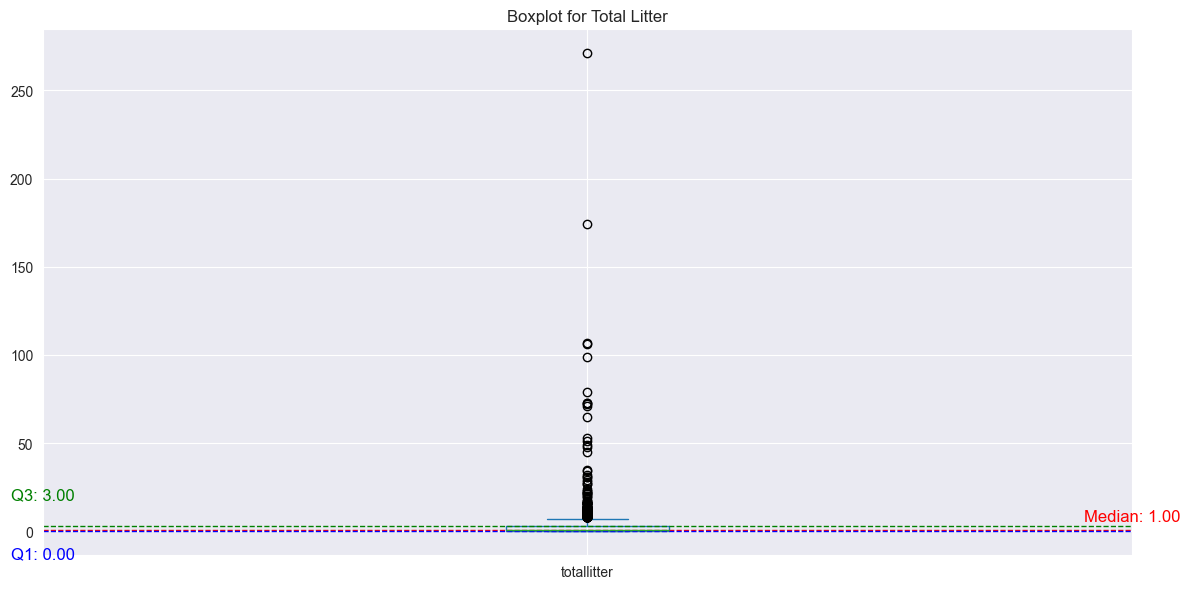

count    4307.000000
mean        2.451823
std         6.979546
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       271.000000
Name: totallitter, dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Boxplot for 'totallitter'
plt.figure(figsize=(12, 6))
ax = raw_df['totallitter'].plot(kind='box')

# Median, 25th and 75th percentiles
Q1 = raw_df['totallitter'].quantile(0.25)
Q3 = raw_df['totallitter'].quantile(0.75)
median = raw_df['totallitter'].median()

# Horizontal line for Median
plt.axhline(median, color='r', linestyle='--', linewidth=1)
plt.text(1.5, median + 5, f'Median: {median:.2f}', color='r', fontsize=12, ha='center')

# Horizontal line for Q1 and Q3
plt.axhline(Q1, color='b', linestyle='--', linewidth=1)
plt.text(0.5, Q1 - 15, f'Q1: {Q1:.2f}', color='b', fontsize=12, ha='center')

plt.axhline(Q3, color='g', linestyle='--', linewidth=1)
plt.text(0.5, Q3 + 15, f'Q3: {Q3:.2f}', color='g', fontsize=12, ha='center')

# Adjust layout for readability
plt.title('Boxplot for Total Litter')
plt.tight_layout()
plt.show()

# Descriptive statistics for 'totallitter'
raw_df['totallitter'].describe()


Key statistical findings include:

* **Mean:** 2.45 items
* **Standard Deviation:** 6.98 (indicating high variability)
* **Minimum:** 0 items
* **Maximum:** 271 items
* **75th Percentile:** 3 items

The clear difference between the 75th percentile and the maximum value suggests a potential outlier.

--- 

**Rationale for Retaining the Maximum Value:**

While the maximum value of 271 significantly deviates from the central tendency of the data, it was kept due to its potential to represent a legitimate data point.

Removing this value may result in the loss of crucial information regarding instances of unusually high litter concentrations. 

Further investigation is required to determine the specific conditions that led to such a high concentration.

--- 

**Rationale for Retaining the 0 Value's:**

The zeros represent locations where there was no marine debris. Retaining them accurately reflects the reality of the environment being studied. 

Some locations will naturally have no litter, either because they haven't been affected by pollution or because of effective cleanup efforts.

### 1.6.4 Outlier Detection: Distance Trawled

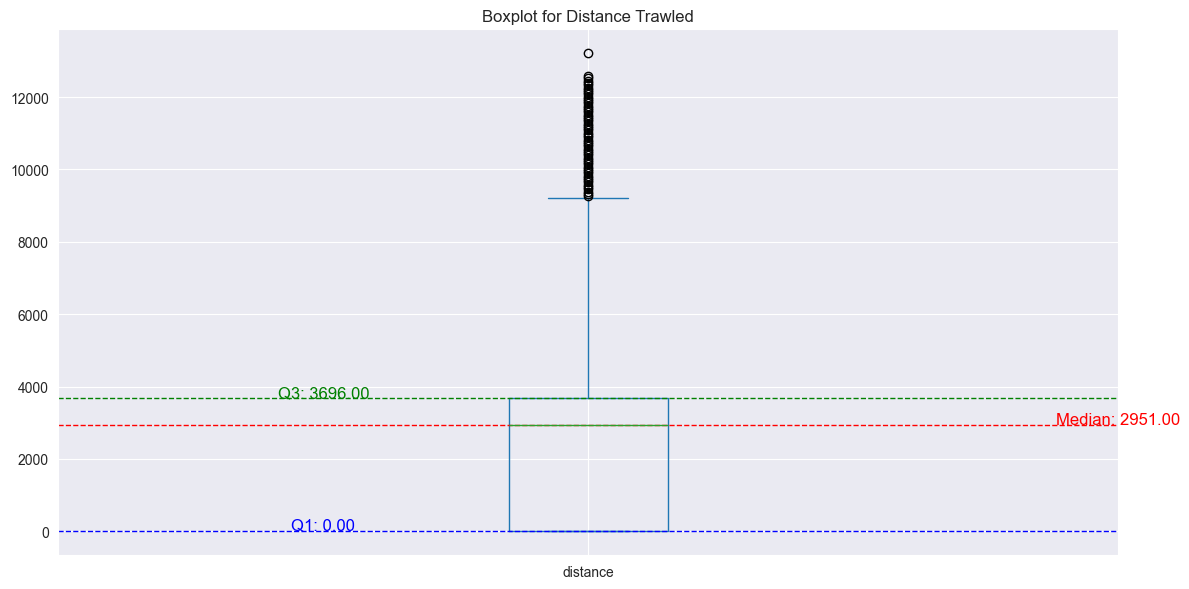

count     4307.000000
mean      2071.758068
std       2212.877810
min          0.000000
25%          0.000000
50%       2951.000000
75%       3696.000000
max      13208.000000
Name: distance, dtype: float64

In [19]:
# Boxplot for 'distance'
plt.figure(figsize=(12, 6))
ax = raw_df['distance'].plot(kind='box')

# Median, 25th and 75th percentiles for 'distance'
Q1 = raw_df['distance'].quantile(0.25)
Q3 = raw_df['distance'].quantile(0.75)
median = raw_df['distance'].median()

# Horizontal line for Median
plt.axhline(median, color='r', linestyle='--', linewidth=1)
plt.text(1.5, median + 5, f'Median: {median:.2f}', color='r', fontsize=12, ha='center')

# Horizontal line for Q1 and Q3
plt.axhline(Q1, color='b', linestyle='--', linewidth=1)
plt.text(0.75, Q1 + 50, f'Q1: {Q1:.2f}', color='b', fontsize=12, ha='center')

plt.axhline(Q3, color='g', linestyle='--', linewidth=1)
plt.text(0.75, Q3 + 15, f'Q3: {Q3:.2f}', color='g', fontsize=12, ha='center')

# Adjust layout for readability
plt.title('Boxplot for Distance Trawled')
plt.tight_layout()
plt.show()

# Descriptive statistics for 'distance'
raw_df['distance'].describe()

### Analysis of 'distance' Column

The 'distance' column, representing the distance covered during surveys, displayed a wide range of values. Key statistical findings include:

* **Mean:** 2071.76 (approximately)
* **Standard Deviation:** 2212.88 (indicating high variability)
* **Minimum:** 0
* **Maximum:** 13208
* **75th Percentile:** 3696

The significant difference between the 75th percentile and the maximum value suggests a potential outlier.

---

**Rationale for Retaining the Maximum Value:**

While the maximum value of 13208 significantly deviates from the central tendency of the data, it was kept due to its potential to represent a legitimate data point.

Removing this value may result in the loss of crucial information regarding instances of unusually long distances covered during surveys.

Further investigation is required to determine the specific conditions that led to such a high distance.

---

**Rationale for Retaining the 0 Values:**

The zeros represent surveys where no distance was recorded. Retaining them accurately reflects the data collected.

These could represent surveys done from a fixed location, or where distance data was not available.

### 1.6.7 Outlier Detection: Wingspread (of Net)

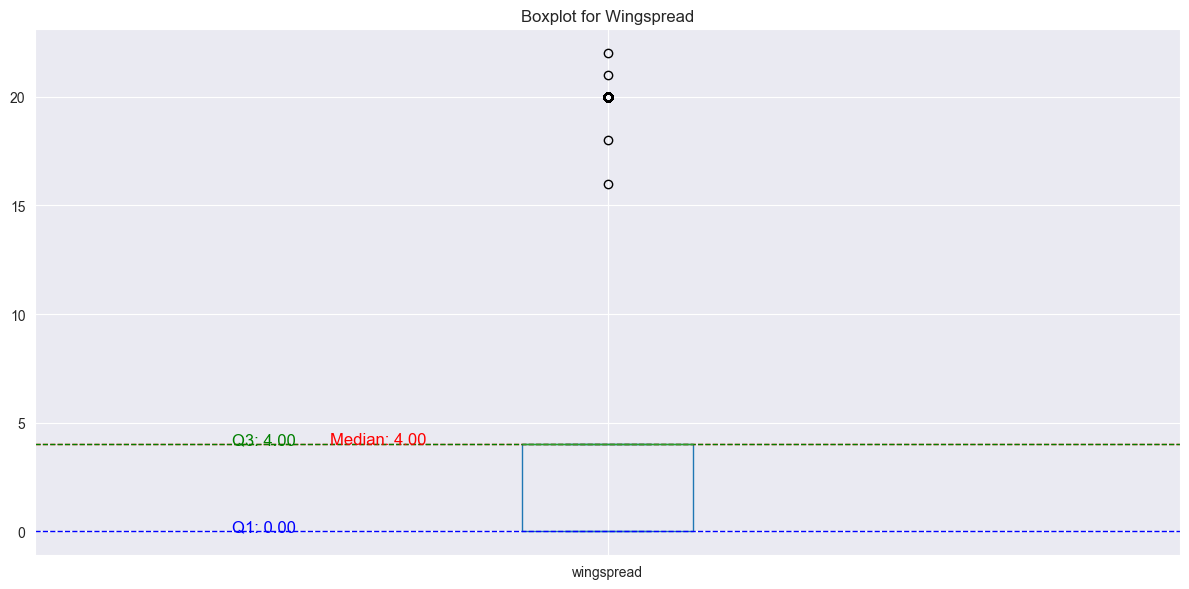

count    4307.000000
mean        3.038078
std         4.618863
min         0.000000
25%         0.000000
50%         4.000000
75%         4.000000
max        22.000000
Name: wingspread, dtype: float64

In [20]:
# Boxplot for 'wingspread'
plt.figure(figsize=(12, 6))
ax = raw_df['wingspread'].plot(kind='box')

# Median, 25th and 75th percentiles for 'wingspread'
Q1 = raw_df['wingspread'].quantile(0.25)
Q3 = raw_df['wingspread'].quantile(0.75)
median = raw_df['wingspread'].median()


# Horizontal line for Median
plt.axhline(median, color='r', linestyle='--', linewidth=1)

# Horizontal line for Q3
plt.axhline(Q3, color='g', linestyle='--', linewidth=1)

# Place annotations for Q3 and Median next to each other
plt.text(0.8, median,  f'Median: {median:.2f}', color='r', fontsize=12, ha='center')
plt.text(0.7, Q3, f'Q3: {Q3:.2f}', color='g', fontsize=12, ha='center')

# Horizontal line for Q1
plt.axhline(Q1, color='b', linestyle='--', linewidth=1)
plt.text(0.7, Q1, f'Q1: {Q1:.2f}', color='b', fontsize=12, ha='center')

# Adjust layout for readability
plt.title('Boxplot for Wingspread')
plt.tight_layout()
plt.show()

# Descriptive statistics for 'wingspread'
raw_df['wingspread'].describe()

In [21]:
# unique values in 'wingspread'
print(raw_df['wingspread'].unique())

[ 0 20 21 22 16 18  4]


### Analysis of 'wingspread' Column

The 'wingspread' column, representing the width of the net or equipment during surveys, showed a mix of values. 

Key statistical findings include:

* **Average Wingspread:** About 3
* **Wingspread Varies:** The wingspread measurements were quite different from each other.
* **Common Wingspreads:** Most surveys had a wingspread of 0 or 4.
* **Widest Wingspread:** The widest wingspread was 22.

**Why We're Keeping These Values:**

These numbers show us how the equipment was used during the surveys. The different wingspreads might tell us about different ways of collecting litter.

## 1.6 Evaluation

I chose to identify the numerical columns in the dataset and inspect the latitude and longitude values to ensure they fall within their valid geographical ranges.

- **Approach**: I used the `dtypes` attribute to select numerical columns and printed their names. Then, I checked the minimum and maximum values for the 'Latitude' and 'Longitude' columns to verify they fall within valid geographical bounds of -90 to 90 for latitude and -180 to 180 for longitude.

- **Alternative Approach**: If I had more time, I could have added validation checks for other geographical data points, such as elevation or time zones, to ensure the dataset's consistency.

- **Limitation**: A limitation of this method is that it only checks the extremes of the latitude and longitude values, without detecting other potential data issues, such as missing or inconsistent geographical data.

---

## Boxplot and Descriptive Statistics for 'Wingspread'

I chose to generate a boxplot for the 'wingspread' column to visually explore its distribution, highlighting the median, quartiles, and potential outliers.

- **Approach**: I created a boxplot for the 'wingspread' column, added horizontal lines for the median (red), Q3 (green), and Q1 (blue), and annotated these values for better clarity. Descriptive statistics were also provided using the `describe()` function to summarise key metrics such as mean, standard deviation, and percentiles.

- **Limitation**: A limitation of this approach is that the boxplot does not reveal more nuanced insights into data distribution, such as skewness or heavy-tailed distributions. The descriptive statistics may also be influenced by outliers, which are not always immediately obvious in the plot.


## 1.7 Verifying Final Dataset

### 1.7.1 Checking for Missing Values - Final

In [22]:
# Check for missing values
missing = raw_df.isna().sum()

print("--- Missing Values ---")
print(missing[missing > 0].sum())

--- Missing Values ---
0


### 1.7.2 CheckingDataFrame shape - Final

In [23]:
# View shape of the dataset
print("\n --- Shape of the Dataset ---")
print(raw_df.shape)


 --- Shape of the Dataset ---
(4307, 52)


### 1.7.3 Checking DataFrame Head - Final

In [24]:
# First 5 rows of the dataset
print("\n --- First 5 Rows of the Dataset ---")
print(raw_df.head())


 --- First 5 Rows of the Dataset ---
   year survey     cruise               area  station   Latitude  Longitude  \
0  1992   IBTS  CIRO 9/92  Greater North Sea        1  51.738333   1.753333   
1  1992   IBTS  CIRO 9/92  Greater North Sea        2  51.601667   2.796667   
2  1992   IBTS  CIRO 9/92  Greater North Sea        3  51.823333   3.643333   
3  1992   IBTS  CIRO 9/92  Greater North Sea        4  52.823333   2.760000   
4  1992   IBTS  CIRO 9/92  Greater North Sea        5  52.685000   3.411667   

        date  bottle  sheet  ...  rope  paper  pallets  other.wood  clothing  \
0 1992-08-14       0      0  ...     0      0        0           0         0   
1 1992-08-15       0      0  ...     0      0        0           0         0   
2 1992-08-15       0      0  ...     0      0        0           0         0   
3 1992-08-16       0      0  ...     0      0        0           0         0   
4 1992-08-16       1      0  ...     0      0        0           0         0   

   sho

### 1.7.4 Checking DataTypes - Final

In [25]:
# Data type check
print("\n --- Data Types ---")
print(raw_df.dtypes)



 --- Data Types ---
year                      int64
survey                   object
cruise                   object
area                     object
station                   int64
Latitude                float64
Longitude               float64
date             datetime64[ns]
bottle                    int64
sheet                     int64
bag                       int64
caps                      int64
fishline.mono             int64
fishline.tang             int64
synthrope                 int64
fishnet                   int64
cabletie                  int64
strap                     int64
crates                    int64
nappies                   int64
santowels                 int64
other.plas                int64
cansfood                  int64
cansdrink                 int64
fishmetal                 int64
drums                     int64
appliance                 int64
carparts                  int64
cables                    int64
other.metal               int64
wellies            

### 1.7.5 Checking Category Dictionary - Final

In [26]:
# Category Dictionary
print("\n --- Categories ---")
for key, value in categories.items():
    print(f"{key}: {value}")


 --- Categories ---
Plastic: ['bottle', 'sheet', 'bag', 'caps', 'fishline.mono', 'fishline.tang', 'synthrope', 'fishnet', 'cabletie', 'strap', 'nappies', 'crates', 'santowels', 'other.plas']
Metal: ['cansfood', 'cansdrink', 'fishmetal', 'drums', 'appliance', 'carparts', 'cables', 'other.metal']
Rubber: ['wellies', 'balloon', 'bobbins', 'tyre', 'gloves', 'other.rub']
Glass: ['jars', 'bottles', 'pieces', 'other.glass']
Plant-Based Materials: ['woodnat', 'woodproc', 'rope', 'paper', 'pallets', 'other.wood']
Clothing & Fabrics: ['clothing', 'shoes']
Miscellaneous: ['other.misc']


In [27]:
# Nicer format
print("\n Marine Litter Categories:")
for category, items in categories.items():
    print(f"- {category}:")  # Add a dash and a space
    for item in items:
        print(f"  * {item}")  # Add two spaces and an asterisk


 Marine Litter Categories:
- Plastic:
  * bottle
  * sheet
  * bag
  * caps
  * fishline.mono
  * fishline.tang
  * synthrope
  * fishnet
  * cabletie
  * strap
  * nappies
  * crates
  * santowels
  * other.plas
- Metal:
  * cansfood
  * cansdrink
  * fishmetal
  * drums
  * appliance
  * carparts
  * cables
  * other.metal
- Rubber:
  * wellies
  * balloon
  * bobbins
  * tyre
  * gloves
  * other.rub
- Glass:
  * jars
  * bottles
  * pieces
  * other.glass
- Plant-Based Materials:
  * woodnat
  * woodproc
  * rope
  * paper
  * pallets
  * other.wood
- Clothing & Fabrics:
  * clothing
  * shoes
- Miscellaneous:
  * other.misc


In [28]:
processed_df = raw_df.copy()

## 1.7 Evaluation

I chose to verify the final dataset by checking for missing values, reviewing its shape, inspecting the first five rows, confirming data types, and reviewing the categorisation of marine litter items.

- **Approach**: I checked for missing values using `isna().sum()` to get a count of missing entries. I also viewed the shape of the dataset, the first five rows, and the data types to ensure the dataset was properly structured. Finally, I printed the marine litter categories in a more readable format.


## 1.8 Saving Cleaned & Processed Dataset

In [29]:
# Save the DataFrame to a new CSV file
processed_df.to_csv('data/02_PROCESSED_NEA-Seafloor-Litter.csv', index=False)

## Data Preprocessing Evaluation

The data preprocessing steps aimed to clean and structure the dataset for further analysis.

- **Approach**: The primary focus was on ensuring that the dataset was free of missing values, duplicates, and had correctly classified categories. The dataset was carefully checked for missing values using functions like `isna().sum()`, and categorical items were classified into meaningful groups. Latitude and longitude columns were validated to ensure their values were within acceptable geographical ranges. The preprocessing steps aimed to address some of the fundamental data issues to facilitate a smoother analysis.

- **Strengths**: The preprocessing steps helped standardise the dataset, making it easier to work with for further analyses. Checking the validity of the numerical columns and ensuring that categorical items were grouped appropriately improved the overall structure of the dataset.

- **Alternative Approaches**: If I had more time, I could have used more advanced techniques, such as applying multiple imputation methods for missing values or using visualisation tools to identify patterns or anomalies in the data.

- **Limitation**: The current preprocessing process mainly addresses the most obvious issues like missing values and duplicates but does not fully address potential complexities such as the presence of subtle outliers, or inconsistencies in how categories are represented.
